In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold

In [2]:
# Load the dataset
boston=pd.read_csv('Housing.csv')
#boston = pd.read_csv('HousingData.csv')

In [3]:
# Split the dataset into features (X) and target variable (y)

X = boston.iloc[:, :-1]  # Select all columns except the last one
Y = boston.iloc[:, -1]   # Select only the last column


In [4]:
# Split the data into training and testing sets
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.2 , random_state=42)

In [5]:
# Standardize the features to ensure that
#all features are on a similar scale and have comparable influence on the distance calculations.

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [6]:
# Fill missing values in both training and test sets with the mean from the training set
x_train_scaled = pd.DataFrame(x_train_scaled, columns=X.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=X.columns)

x_train_scaled.fillna(x_train_scaled.mean(), inplace=True)
x_test_scaled.fillna(x_train_scaled.mean(), inplace=True)
Y_clean_train = y_train.fillna(Y.mean())

In [7]:
# Initialize the KNN regressor model
knn_regressor = KNeighborsRegressor(n_neighbors=9)

In [8]:
# Create a KFold cross-validator with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [9]:
# Perform cross-validation and print the mean and standard deviation of the scores
cross_val_scores = cross_val_score(knn_regressor, x_train_scaled, Y_clean_train, cv=kf, scoring='neg_mean_squared_error')

mse_scores = -cross_val_scores  # convert scores back to positive

In [10]:
#Train the model with our training data
knn_regressor.fit(x_train_scaled, y_train)


KNeighborsRegressor(n_neighbors=9)

In [11]:
#Warning
#occurs when using scikit-learn's KNeighborsRegressor with a NumPy array for your input data (X)
#that doesn't have feature names associated with it.
#When you use a Pandas DataFrame, the column names serve as feature names, 
#but with NumPy arrays, scikit-learn might not be able to determine the feature names
#this warning doesn't affect the functionality of the model

In [12]:
# Make predictions on the test set
y_predict = knn_regressor.predict(x_test_scaled)
print(y_predict)

[190500.         193422.22222222 175433.33333333 ...  95433.33333333
 110433.33333333  79022.22222222]


In [13]:
print(y_test)

538     173400
6810    210900
6630    146600
7283    125000
6697    358700
         ...  
1672    197000
921     243500
322      87100
2945     33200
3245     60700
Name: median_house_value, Length: 1605, dtype: int64


In [14]:
# Evaluate the model
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

In [15]:
rmse = np.sqrt(np.mean(mse_scores))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 56438.011742719355


In [16]:
print(f'R^2 Score: {r2}')

R^2 Score: 0.7545223381157126


In [17]:
print(f'Mean MSE: {np.mean(mse_scores)}')
print(f'Standard Deviation MSE: {np.std(mse_scores)}')


Mean MSE: 3185249169.471328
Standard Deviation MSE: 262635941.85936466


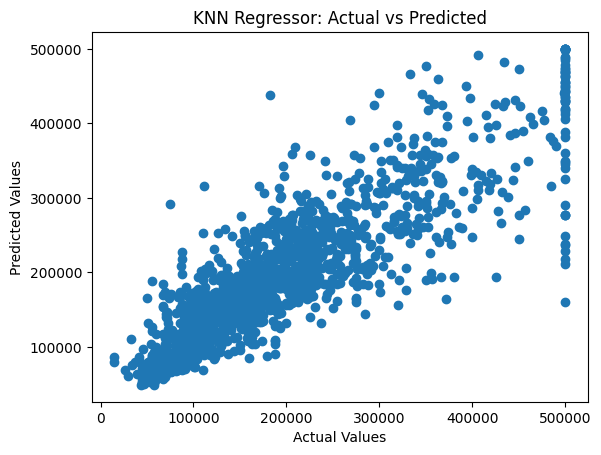

In [18]:
# Visualize the results
plt.scatter(y_test, y_predict)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('KNN Regressor: Actual vs Predicted')
plt.show()